In [2]:
import pandas as pd
import seaborn
import matplotlib.pyplot as pyplot
import scipy
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Median value of owner-occupied homes" boxplot

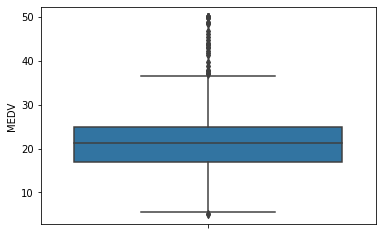

In [5]:
ax = seaborn.boxplot(y="MEDV", data=boston_df)

# Histogram for the Charles river variable

Text(0.5, 1.0, 'Charles River Histogram')

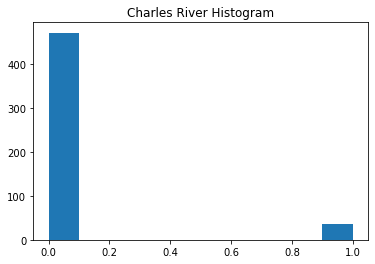

In [7]:
pyplot.hist(x='CHAS', data=boston_df)
pyplot.title('Charles River Histogram')

#  Boxplot MEDV variable vs the AGE variable

In [19]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 45)&(boston_df['AGE'] < 70), 'Age_Group'] = '45 and 70 '
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 and older'

younger = boston_df[boston_df['Age_Group'] == '35 years and younger']['MEDV']
middle = boston_df[boston_df['Age_Group'] == 'between 35 and 70 years']['MEDV']
older = boston_df[boston_df['Age_Group'] == '70 years and older']['MEDV']

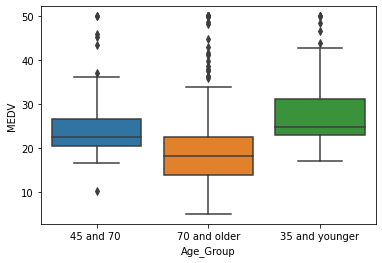

In [20]:
ax = seaborn.boxplot(x= boston_df["Age_Group"], y=boston_df["MEDV"], data=boston_df)

# Scatter plot Nitric oxid eand non-retail business acres per town

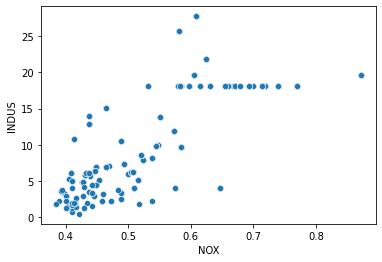

In [17]:
ax = seaborn.scatterplot(x='NOX', y='INDUS', data=boston_df)

# Histogram for the pupil to teacher ratio

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

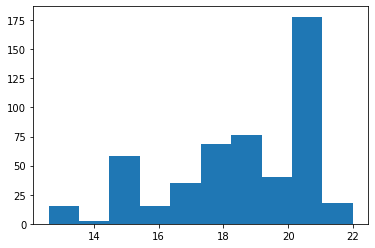

In [39]:
pyplot.hist(boston_df['PTRATIO'])

# Is there a significant difference in median value of houses bounded by the Charles river or not?

In [45]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

In [21]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ Age_Group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq          F        PR(>F)
Age_Group    2.0   5107.193533  2553.596767  33.147229  3.456852e-14
Residual   467.0  35976.754126    77.038017        NaN           NaN


# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

In [56]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

In [57]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        23:37:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""